**Fuller's problem**

We consider a system defined by its position $ x(t) $ and its speed $ x'(t) $. The system starts with an initial position $ x(0) = 0 $ and an initial speed $ x'(0) = 1 $. We control the acceleration of the system, denoted as $ x''(t) = u(t) $. Our goal is to minimize a cost function by adjusting the control $ u(t) $. For this problem, we set $ T = 10 $.

- **State constraint**: None
- **Control constraint**: $$ u(t) \in [-1, 1] $$
- **Objective function**:

$$
J(u) = \int_{0}^{T} x^2(t) \, dt
$$

Our aim is to bring the system's state $ x(t) $ as close to zero as possible.

**Pontryagin's Principle**

A brief study (see Fuller.pdf) shows that $ u(t) = -\text{sgn}(\lambda_2(t)) $, where $ \lambda_2 $ is a co-state variable present in the Hamiltonian of this problem. Therefore, for all $ t $,
$$
u(t) \in \{-1, 0, 1\}
$$

Here, we choose a small number of calculation points $ N = 8 $ and aim to naively optimize the value of $ J(u) $ by testing all possible values of $ u $ (i.e., $ 3^N $).

**Note:** Another approach could involve solving the system of differential equations involving the functions $ \lambda_1 $, $ \lambda_2 $, $ x $, and $ u $. However, the presence of the necessary condition (from Pontryagin) $ \lambda_1(T) = \lambda_2(T) = 0 $ complicates the exercise, due to the fact that the equation $ u(t) = -\text{sgn}(\lambda_2(t)) $ introduces non-linearity.

**Chattering**

The phenomenon is not greatly observed below because $ N $ and $ T $ are relatively small, but be cautious: increasing these variables can significantly increase the computation time.


In [74]:
# it takes typically 40s to run this cell with T=10, N=8

import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.integrate import solve_ivp

T = 10
N = 8
Deltat = T / N

x_initial = 0
v_initial = 1

def system(t, y, u):
    x, v = y
    index = min(int(t // Deltat)-1, N-1)
    dxdt = v
    dvdt = u[index]
    return [dxdt, dvdt]

def simulate_and_compute_integral(u):
    sol = solve_ivp(system, [0, T], [x_initial, v_initial], args=(u,), t_eval=np.linspace(0, T, 100*N))

    x = sol.y[0]
    v = sol.y[1]

    integral_x2 = np.sum(x**2) * Deltat/100

    return integral_x2, x, v

all_u_combinations = list(product([-1, 0, 1], repeat=N))

min_integral = float('inf')
optimal_u = None
optimal_x = None
optimal_v = None

for u_combination in all_u_combinations:
    u = np.array(u_combination)
    integral_x2, x, v = simulate_and_compute_integral(u)

    if integral_x2 < min_integral:
        min_integral = integral_x2
        optimal_u = u
        optimal_x = x
        optimal_v = v


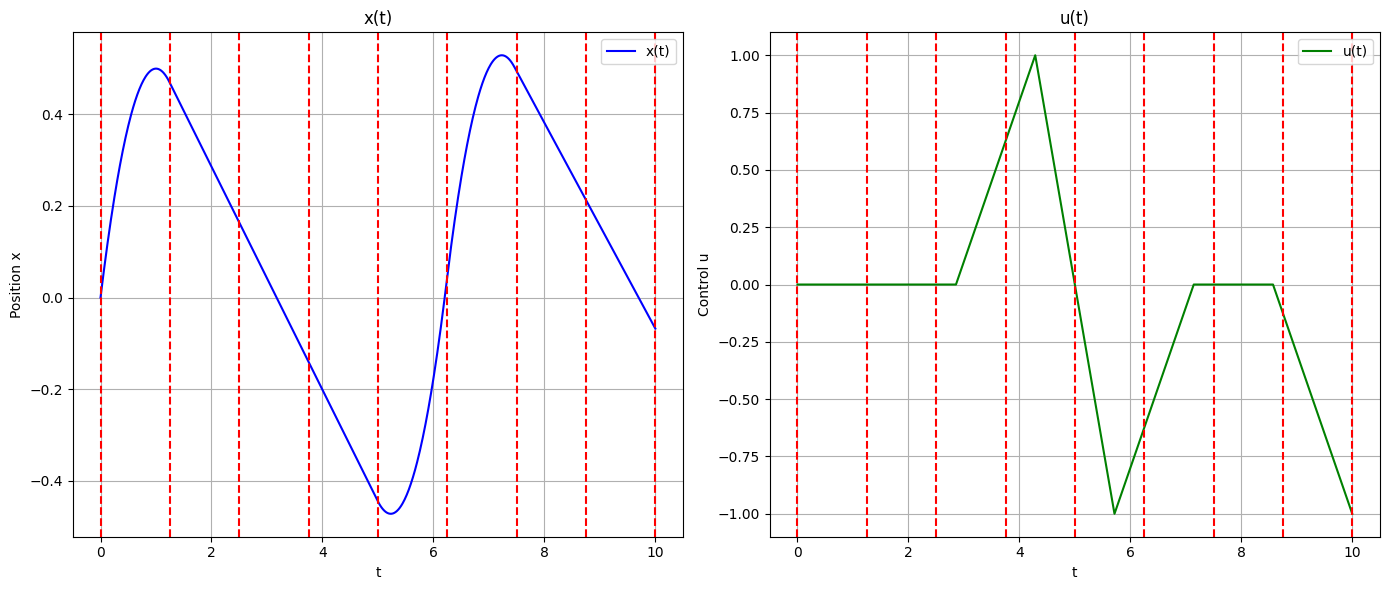

In [76]:

plt.figure(figsize=(14, 6))

# x(t)
plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, T, 100*N), optimal_x, label='x(t)', color='blue')
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=Deltat, color='red', linestyle='--')
plt.axvline(x=2*Deltat, color='red', linestyle='--')
plt.axvline(x=3*Deltat, color='red', linestyle='--')
plt.axvline(x=4*Deltat, color='red', linestyle='--')
plt.axvline(x=5*Deltat, color='red', linestyle='--')
plt.axvline(x=6*Deltat, color='red', linestyle='--')
plt.axvline(x=7*Deltat, color='red', linestyle='--')
plt.axvline(x=8*Deltat, color='red', linestyle='--')
plt.title('x(t)')
plt.xlabel('t')
plt.ylabel('Position x')
plt.grid(True)
plt.legend()

# u(t)
plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, T, N), optimal_u, label='u(t)', color='green')
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=Deltat, color='red', linestyle='--')
plt.axvline(x=2*Deltat, color='red', linestyle='--')
plt.axvline(x=3*Deltat, color='red', linestyle='--')
plt.axvline(x=4*Deltat, color='red', linestyle='--')
plt.axvline(x=5*Deltat, color='red', linestyle='--')
plt.axvline(x=6*Deltat, color='red', linestyle='--')
plt.axvline(x=7*Deltat, color='red', linestyle='--')
plt.axvline(x=8*Deltat, color='red', linestyle='--')
plt.title('u(t)')
plt.xlabel('t')
plt.ylabel('Control u')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()